# TFM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

# Extrayendo muestra

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

In [9]:
#datos_sample.to_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv",index = False)

# Limpiando datos

In [9]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [10]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [11]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [12]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [13]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [14]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [15]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [16]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

In [17]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

In [18]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        229.690080
std        7502.284364
min      -86373.000000
25%         378.000000
50%         652.000000
75%        1117.000000
max       86048.000000
Name: time_duration, dtype: float64

(array([6.38300e+03, 3.15000e+02, 1.84000e+02, 1.33000e+02, 3.85600e+03,
        8.69718e+05, 4.40000e+01, 7.00000e+00, 5.00000e+00, 8.50000e+01]),
 array([-86373. , -69130.9, -51888.8, -34646.7, -17404.6,   -162.5,
         17079.6,  34321.7,  51563.8,  68805.9,  86048. ]),
 <a list of 10 Patch objects>)

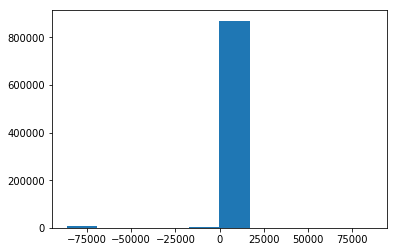

In [21]:
plt.hist(datos_sample["time_duration"])

In [22]:
datos_sample = datos_sample[datos_sample["time_duration"] > 0]

(array([2.42900e+03, 3.79400e+03, 4.80400e+03, 1.91020e+04, 2.10288e+05,
        4.34025e+05, 1.81330e+05, 1.32800e+04, 9.60000e+01, 1.03000e+02]),
 array([ 0.69314718,  1.76009968,  2.82705218,  3.89400468,  4.96095718,
         6.02790968,  7.09486218,  8.16181468,  9.22876718, 10.29571968,
        11.36267218]),
 <a list of 10 Patch objects>)

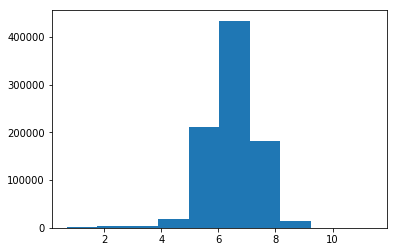

In [26]:
plt.hist(np.log1p(datos_sample["time_duration"]))

In [27]:
datos_sample = datos_sample[datos_sample["time_duration"] > 180]

(array([1.21613e+05, 2.38467e+05, 2.51310e+05, 1.48912e+05, 5.19580e+04,
        7.85000e+03, 2.69000e+02, 3.70000e+01, 2.50000e+01, 9.20000e+01]),
 array([ 5.20400669,  5.81987324,  6.43573979,  7.05160634,  7.66747288,
         8.28333943,  8.89920598,  9.51507253, 10.13093908, 10.74680563,
        11.36267218]),
 <a list of 10 Patch objects>)

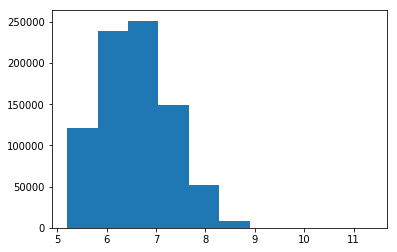

In [28]:
plt.hist(np.log1p(datos_sample["time_duration"]))

In [61]:
VendorID = datos_sample.groupby("VendorID")["key"].count().reset_index()
VendorID.columns = ["VendorID","Cantidad"]
VendorID["VendorID"] = VendorID["VendorID"].replace(1,"Tipo_1")
VendorID["VendorID"] = VendorID["VendorID"].replace(2,"Tipo_2")

In [63]:
VendorID

,VendorID,Cantidad
0,Tipo_1,132787
1,Tipo_2,687745


<BarContainer object of 2 artists>

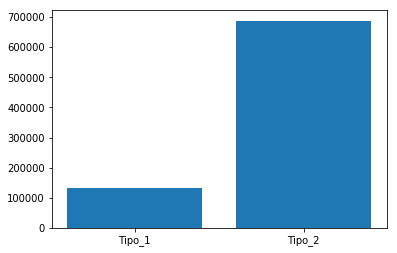

In [62]:
plt.bar(VendorID["VendorID"],VendorID["Cantidad"])

In [64]:
StoreFwdFlag = datos_sample.groupby("store_and_fwd_flag")["key"].count().reset_index()
StoreFwdFlag.columns = ["store_and_fwd_flag","Cantidad"]
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(0,"N")
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(1,"Y")

In [65]:
StoreFwdFlag

,store_and_fwd_flag,Cantidad
0,N,819079
1,Y,1453


<BarContainer object of 2 artists>

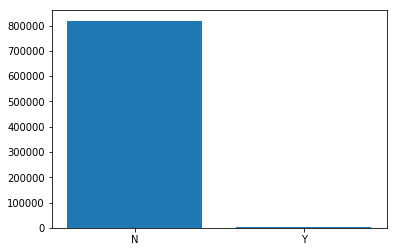

In [66]:
plt.bar(StoreFwdFlag["store_and_fwd_flag"],StoreFwdFlag["Cantidad"])

In [57]:
datos_sample = datos_sample[datos_sample["RatecodeID"] != 99]

In [58]:
RateCodeID = datos_sample.groupby("RatecodeID")["key"].count().reset_index()
RateCodeID.columns = ["RatecodeID","Cantidad"]
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(1,"Tasa Estandar")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(2,"JFK")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(3,"Newark")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(4,"Nassau o Westchester")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(5,"Tarifa Negociada")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(6,"Viaje Grupo")

In [59]:
RateCodeID

,RatecodeID,Cantidad
0,Tasa Estandar,799407
1,JFK,1135
2,Newark,243
3,Nassau o Westchester,578
4,Tarifa Negociada,19168
5,Viaje Grupo,1


<BarContainer object of 6 artists>

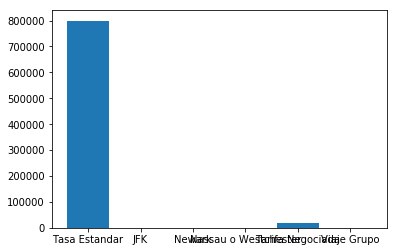

In [60]:
plt.bar(RateCodeID["RatecodeID"],RateCodeID["Cantidad"])

In [67]:
Pasenger = datos_sample.groupby("passenger_count")["key"].count().reset_index()
Pasenger.columns = ["passenger_count","Cantidad"]

In [68]:
Pasenger

,passenger_count,Cantidad
0,0,1031
1,1,695119
2,2,63477
3,3,13291
4,4,4783
5,5,28132
6,6,14689
7,7,6
8,8,3
9,9,1


<BarContainer object of 10 artists>

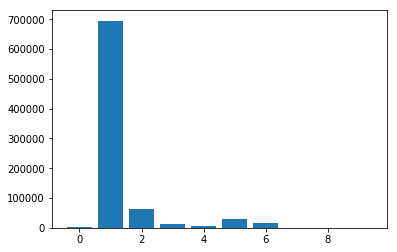

In [70]:
plt.bar(Pasenger["passenger_count"],Pasenger["Cantidad"])

In [74]:
datos_sample["trip_distance"].describe()

count    820532.000000
mean          3.335524
std           3.749774
min           0.000000
25%           1.170000
50%           2.040000
75%           3.980000
max         621.100000
Name: trip_distance, dtype: float64

(array([1.23040e+05, 3.71162e+05, 2.04118e+05, 9.10850e+04, 2.89650e+04,
        2.12400e+03, 3.10000e+01, 5.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0.        , 0.64331009, 1.28662017, 1.92993026, 2.57324034,
        3.21655043, 3.85986051, 4.5031706 , 5.14648068, 5.78979077,
        6.43310085]),
 <a list of 10 Patch objects>)

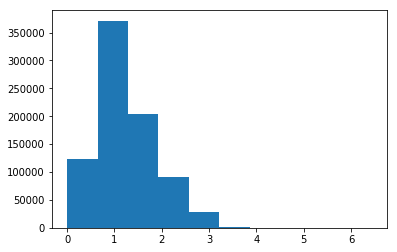

In [73]:
plt.hist(np.log1p(datos_sample["trip_distance"]))

In [75]:
PaymentType = datos_sample.groupby("payment_type")["key"].count().reset_index()
PaymentType.columns = ["payment_type","Cantidad"]
PaymentType["payment_type"] = PaymentType["payment_type"].replace(1,"Tarjeta Credito")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(2,"Efectivo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(3,"Sin Cargo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(4,"Disputa")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(5,"Desconocido")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(6,"Viaje Vacio")

In [76]:
PaymentType

,payment_type,Cantidad
0,Tarjeta Credito,475510
1,Efectivo,341625
2,Sin Cargo,2059
3,Disputa,1309
4,Desconocido,29


<BarContainer object of 5 artists>

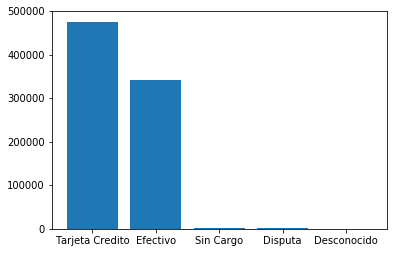

In [77]:
plt.bar(PaymentType["payment_type"],PaymentType["Cantidad"])

In [84]:
DayofWeek = datos_sample.groupby("dayofweek")["key"].count().reset_index()
DayofWeek.columns = ["dayofweek","Cantidad"]
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(0,"Lunes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(1,"Martes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(2,"Miercoles")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(3,"Jueves")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(4,"Viernes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(5,"Sabado")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(6,"Domingo")

In [81]:
DayofWeek

,dayofweek,Cantidad
0,Lunes,108436
1,Martes,111858
2,Miercoles,114108
3,Jueves,119161
4,Viernes,130166
5,Sabado,129799
6,Domingo,107004


<BarContainer object of 7 artists>

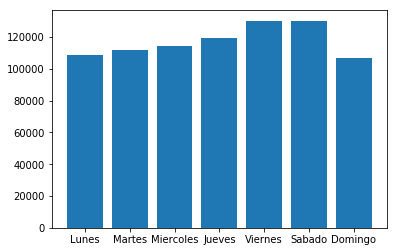

In [82]:
plt.bar(DayofWeek["dayofweek"],DayofWeek["Cantidad"])

In [85]:
DayofMonth = datos_sample.groupby("dayofmonth")["key"].count().reset_index()
DayofMonth.columns = ["dayofmonth","Cantidad"]

<BarContainer object of 31 artists>

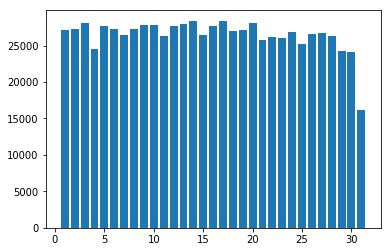

In [87]:
plt.bar(DayofMonth["dayofmonth"],DayofMonth["Cantidad"])

In [88]:
Month = datos_sample.groupby("month")["key"].count().reset_index()
Month.columns = ["month","Cantidad"]

<BarContainer object of 12 artists>

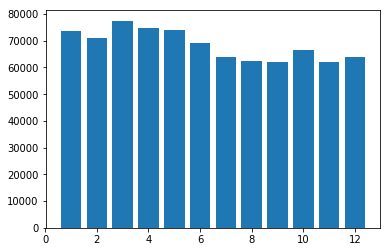

In [89]:
plt.bar(Month["month"],Month["Cantidad"])

In [90]:
Hora = datos_sample.groupby("hora_pickup")["key"].count().reset_index()
Hora.columns = ["hora_pickup","Cantidad"]

<BarContainer object of 24 artists>

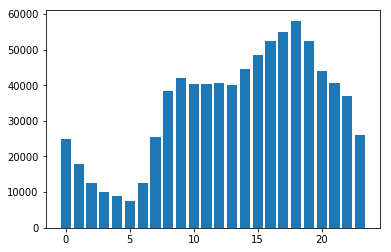

In [91]:
plt.bar(Hora["hora_pickup"],Hora["Cantidad"])

In [97]:
datos_sample2["total_amount"].describe()

count    820532.000000
mean         16.246358
std          16.907212
min        -107.800000
25%           8.760000
50%          12.300000
75%          19.300000
max       10528.750000
Name: total_amount, dtype: float64

(array([8.20531e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -107.8  ,   955.855,  2019.51 ,  3083.165,  4146.82 ,  5210.475,
         6274.13 ,  7337.785,  8401.44 ,  9465.095, 10528.75 ]),
 <a list of 10 Patch objects>)

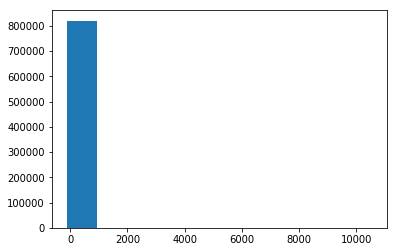

In [99]:
plt.hist(datos_sample2["total_amount"])

In [108]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 0]

(array([9.86000e+02, 1.22980e+04, 5.02251e+05, 2.60166e+05, 4.34110e+04,
        5.89000e+02, 1.20000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.92619599, 1.85239197, 2.77858796, 3.70478395,
        4.63097993, 5.55717592, 6.4833719 , 7.40956789, 8.33576388,
        9.26195986]),
 <a list of 10 Patch objects>)

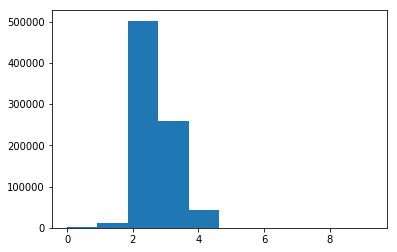

In [109]:
plt.hist(np.log1p(datos_sample["total_amount"]))

In [110]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 5]

(array([3.75751e+05, 3.21033e+05, 1.03108e+05, 1.59940e+04, 2.52000e+02,
        1.30000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.79175947, 2.53877951, 3.28579955, 4.03281959, 4.77983963,
        5.52685967, 6.27387971, 7.02089974, 7.76791978, 8.51493982,
        9.26195986]),
 <a list of 10 Patch objects>)

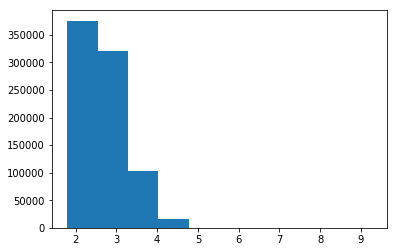

In [111]:
plt.hist(np.log1p(datos_sample["total_amount"]))

In [112]:
datos_sample2 = datos_sample[["key","VendorID","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","trip_type","total_amount","hora_pickup","dayofweek","dayofmonth","month","time_duration"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"

In [113]:
datos_sample2.isnull().sum()

key                   0
VendorID              0
store_and_fwd_flag    0
RatecodeID            0
PULocationID          0
DOLocationID          0
passenger_count       0
trip_distance         0
payment_type          0
trip_type             0
total_amount          0
hora_pickup           0
dayofweek             0
dayofmonth            0
month                 0
time_duration         0
dtype: int64

# Escalando variables

In [114]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [115]:
datos_sample2.columns

Index(['key', 'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'total_amount', 'hora_pickup', 'dayofweek', 'dayofmonth',
       'month', 'time_duration'],
      dtype='object')

In [116]:
X_num = datos_sample2.drop(["key","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', "trip_distance", 'payment_type',
                    'trip_type', 'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [117]:
X = X_scaled
y = np.log1p(datos_sample2["time_duration"])

In [118]:
y.describe()

count    816153.000000
mean          6.591688
std           0.700096
min           5.204007
25%           6.068426
50%           6.553933
75%           7.065613
max          11.362672
Name: time_duration, dtype: float64

(array([1.18456e+05, 2.38009e+05, 2.50898e+05, 1.48684e+05, 5.18670e+04,
        7.82300e+03, 2.66000e+02, 3.60000e+01, 2.50000e+01, 8.90000e+01]),
 array([ 5.20400669,  5.81987324,  6.43573979,  7.05160634,  7.66747288,
         8.28333943,  8.89920598,  9.51507253, 10.13093908, 10.74680563,
        11.36267218]),
 <a list of 10 Patch objects>)

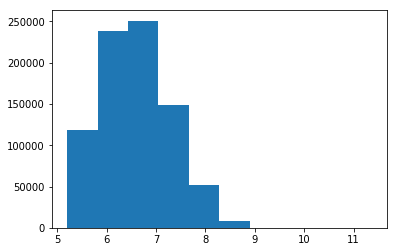

In [119]:
plt.hist(y)

# Particion train-test

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

# Modelo

In [121]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [122]:
mod_rf = rf.fit(X_train,y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
pred_rf = mod_rf.predict(X_test)

# Metricas de modelo

In [124]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rf),mean_squared_error(y_test,pred_rf)**(0.5)

(0.083409365256951, 0.2888067957250158)

In [125]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

0.2169294969455365

In [126]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

3.3164032364204963

In [127]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rf)

0.9108923747469414

# Importancia de variables

In [128]:
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [129]:
feature_importances

,importance
trip_distance,0.801740
hora_pickup,0.042996
DOLocationID,0.042639
PULocationID,0.033889
dayofmonth,0.026637
month,0.020135
dayofweek,0.016679
passenger_count,0.005550
payment_type,0.005046
VendorID,0.002862


# Graficando las zonas

In [46]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps

/usr/local/lib/python3.6/dist-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Opcion 1

In [80]:
datos_mapa_shp = gpd.read_file("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [81]:
datos_mapa_shp.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [82]:
plt.rcParams['figure.figsize'] = (20,20) #Size of figure
plt.rcParams['figure.dpi'] = 250

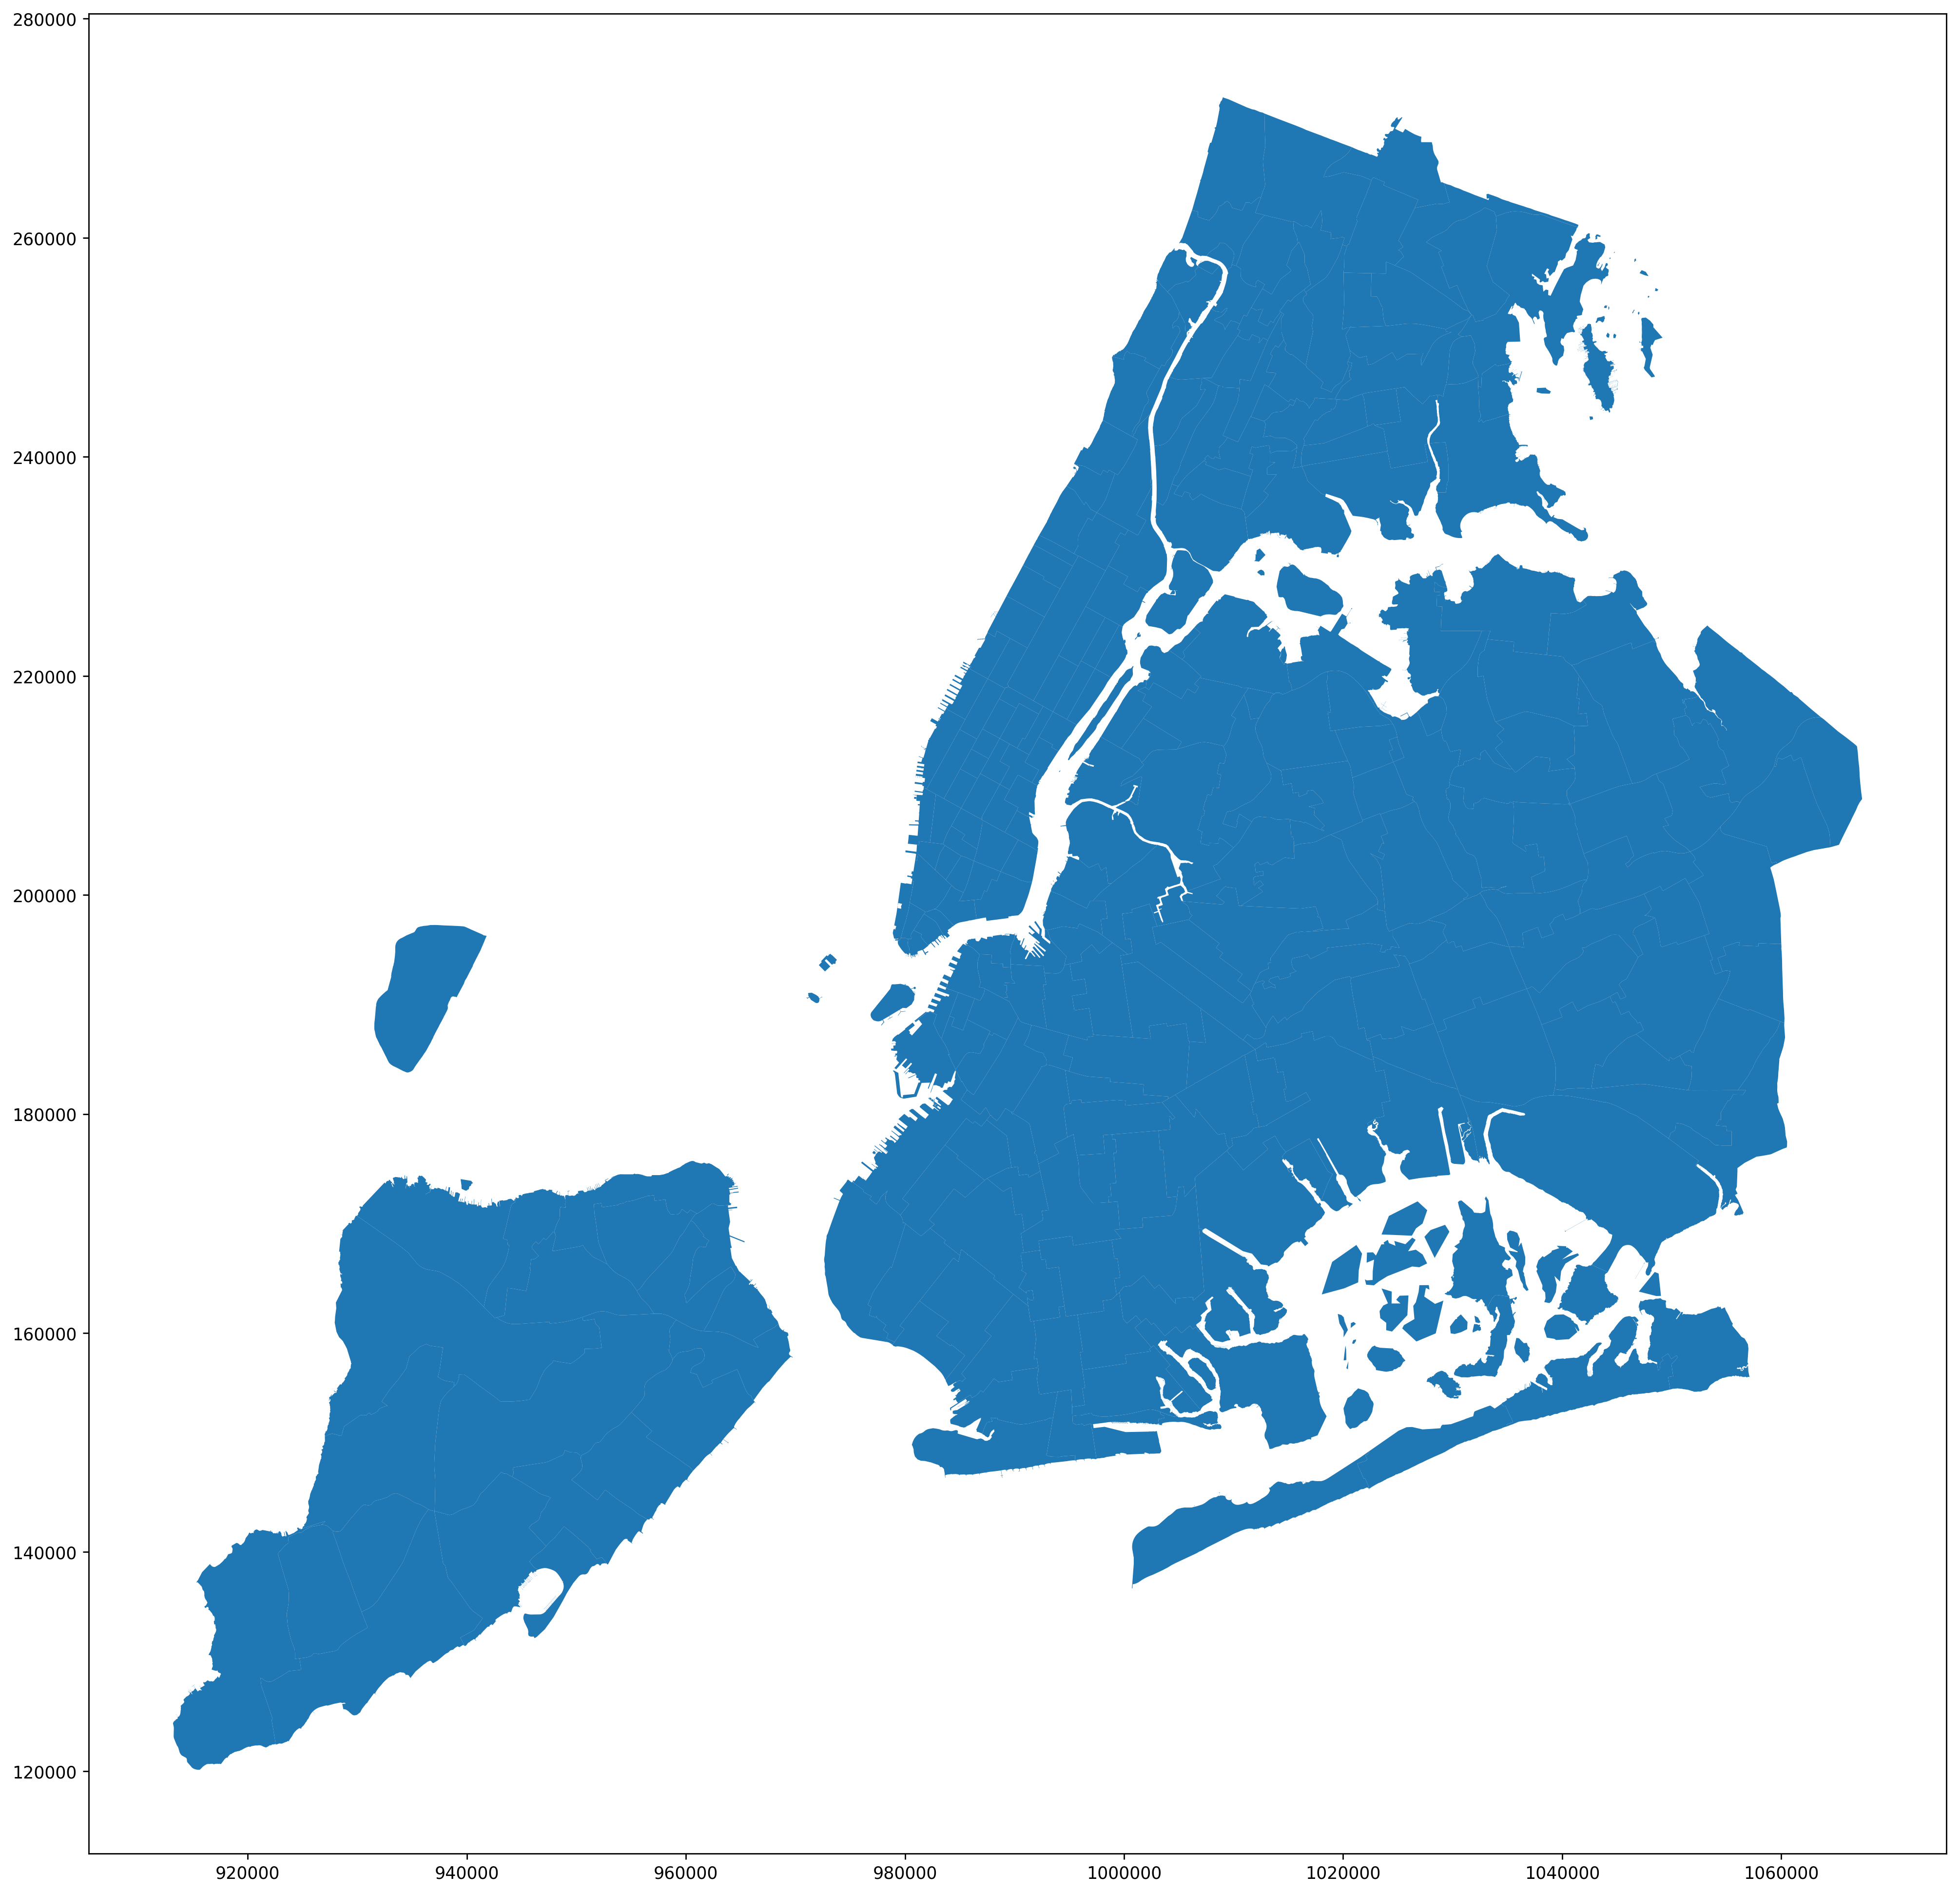

In [83]:
datos_mapa_shp.plot(alpha = 1)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:400: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


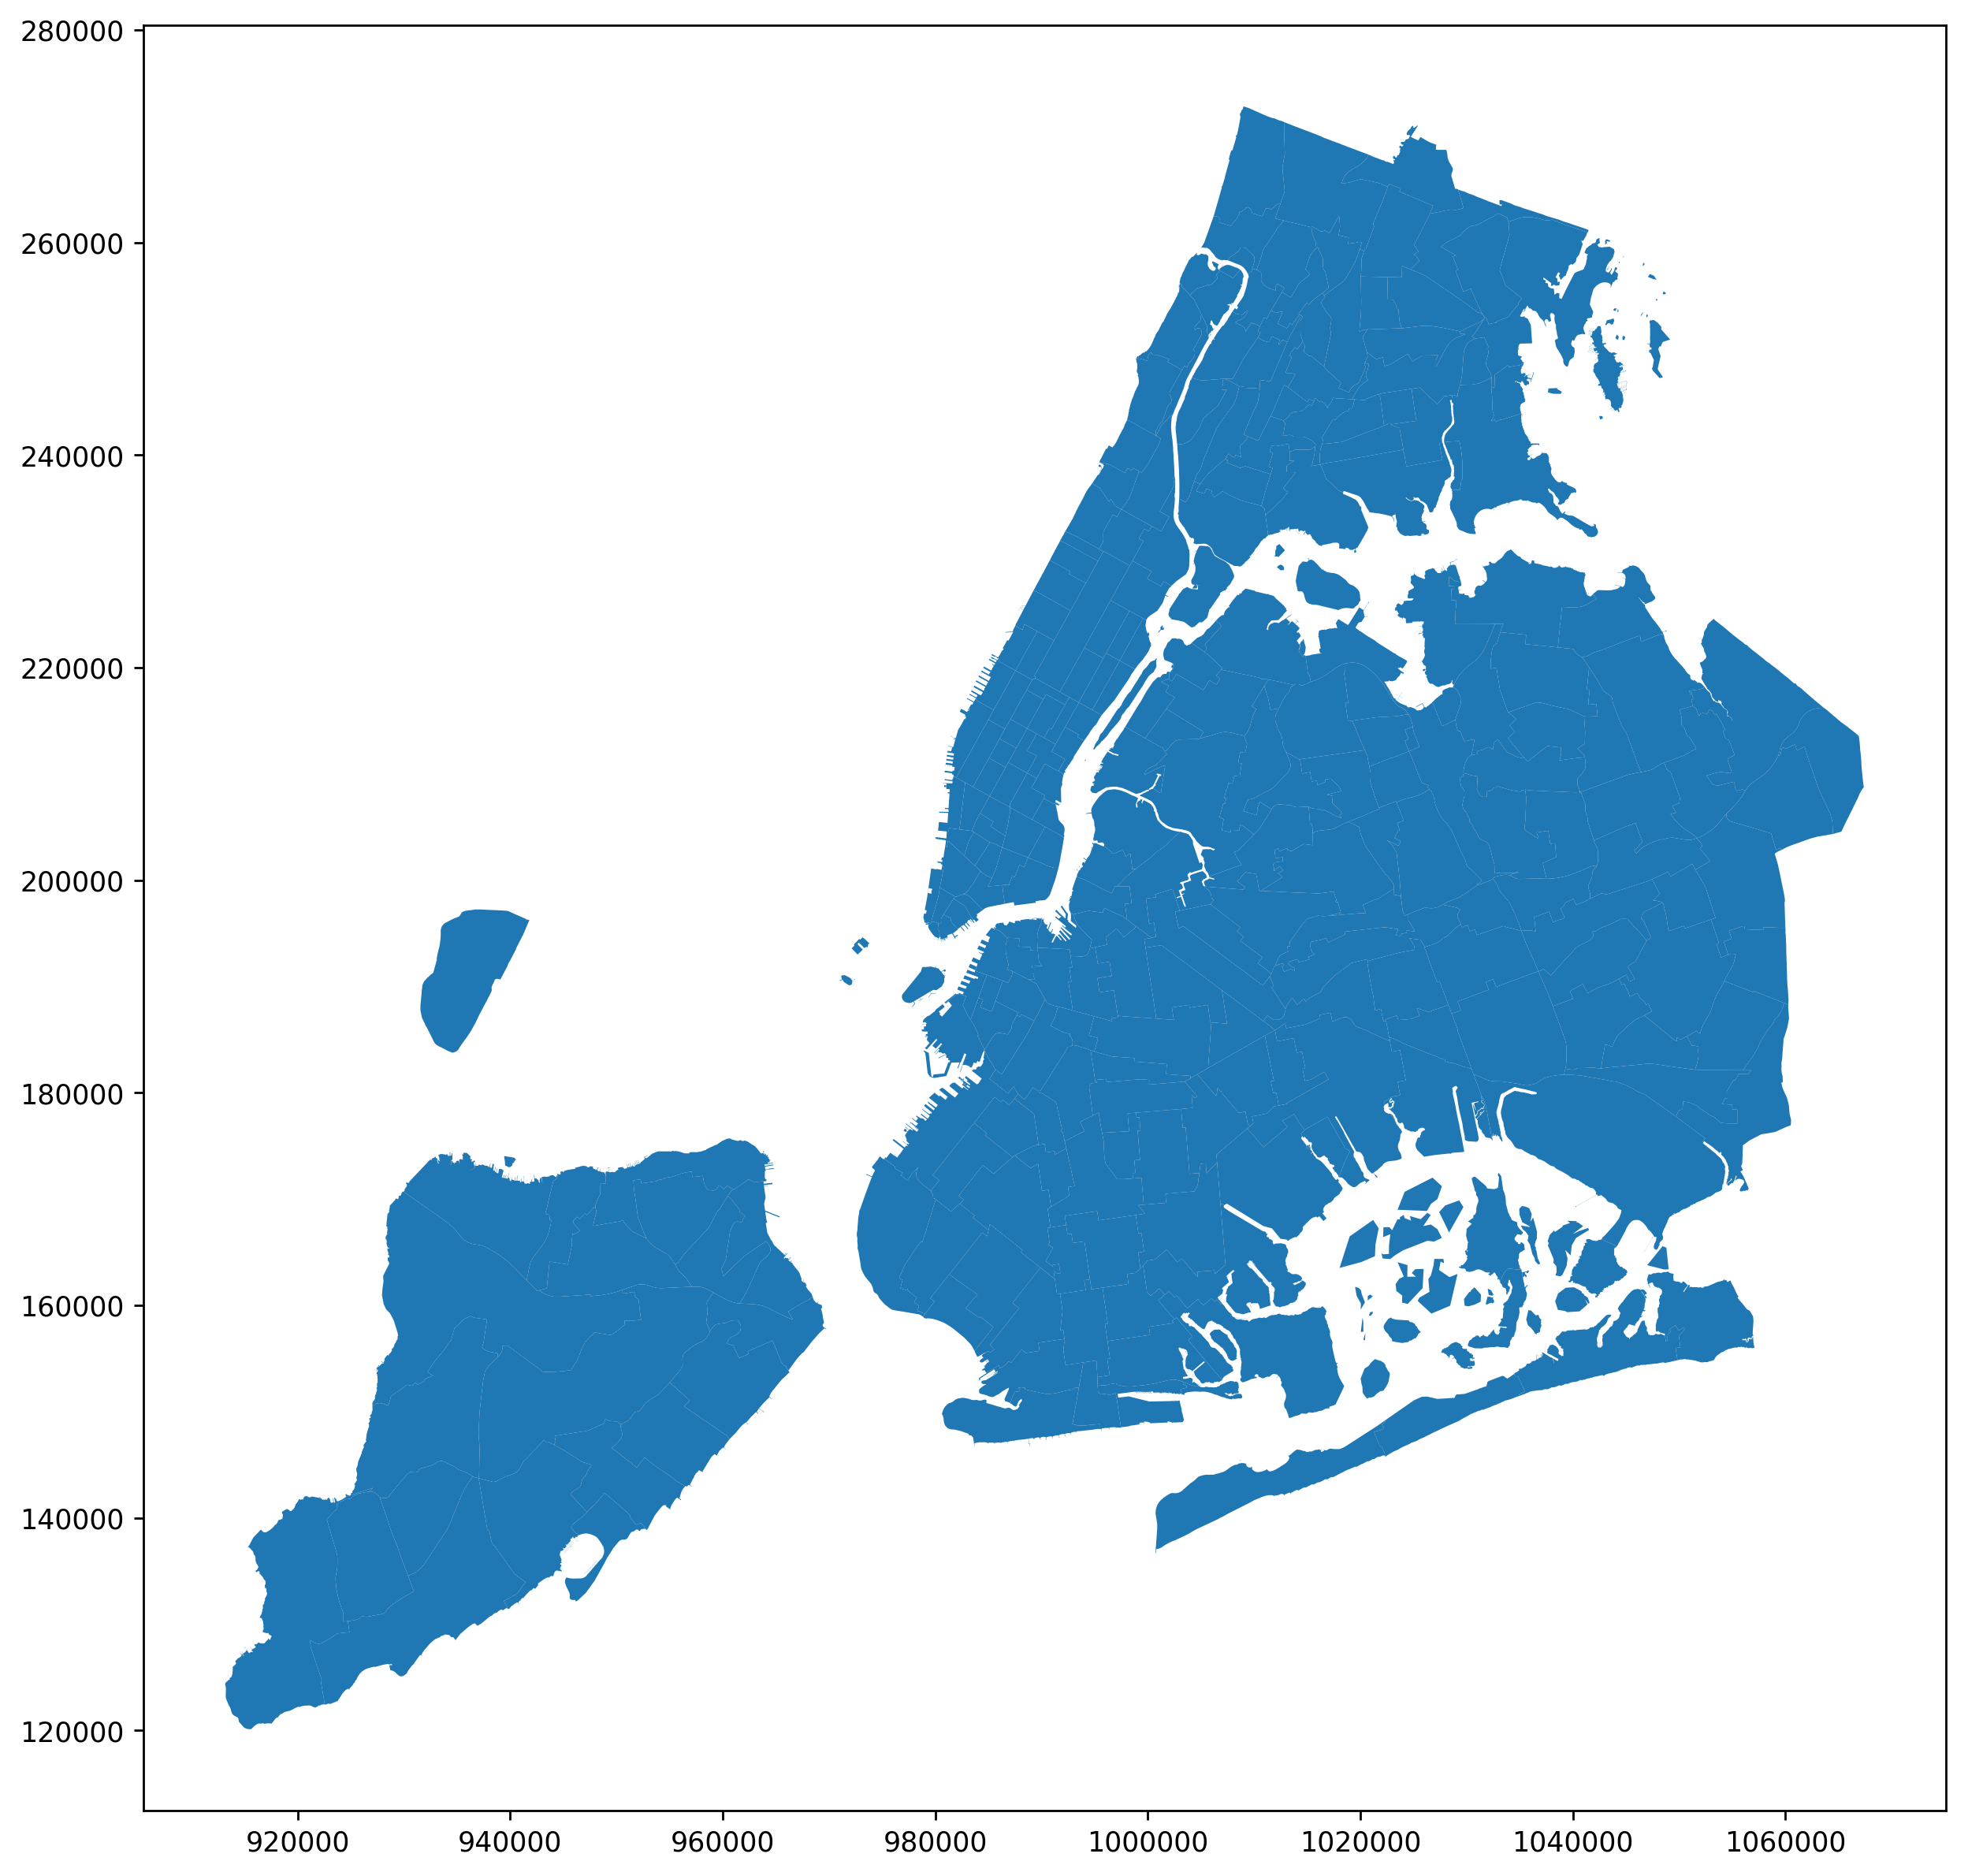

In [84]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = datos_mapa_shp.plot(axes=ax)
plt.show()

# Opcion 2

In [47]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [48]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

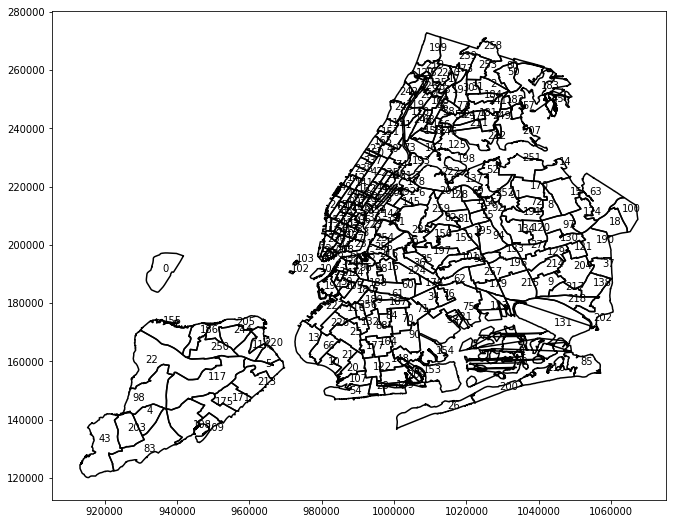

In [49]:
plot_map(sf)

In [50]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [51]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [52]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [53]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [54]:
df = read_shapefile(sf)

In [56]:
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,coords
0,1,0.116357,0.000782,Newark Airport,1,EWR,"[(933100.9183527103, 192536.08569720192), (933..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"[(1033269.2435912937, 172126.0078125), (103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"[(1026308.7695066631, 256767.6975403726), (102..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"[(992073.4667968601, 203714.07598876953), (992..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"[(935843.3104932606, 144283.33585065603), (936..."



1: 0 => -1 

   1   2   3   4   5   6


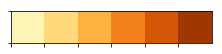

<Figure size 792x648 with 0 Axes>

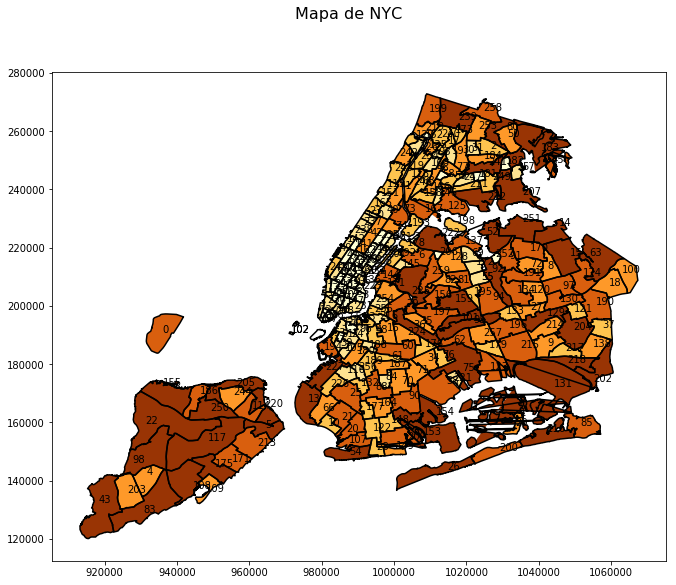

In [55]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["Shape_Leng"])

plot_comunas_data(sf,title,names, data, 4, True)

In [28]:
import json # or import geojson
with open("/home/michael/Kschool/TFM/Importe_Taxi/NYC_Taxi_Zones.geojson") as json_file:
    json_data = json.load(json_file)

In [76]:
geometry = []
for element in list(json_data.values())[1]:
    geometry.append(element["geometry"])

In [57]:
datos_map.head()

,coordinates,type
0,"[[[[-74.18445299999996, 40.694995999999904], [...",MultiPolygon
1,"[[[[-73.82337597260663, 40.63898704717672], [-...",MultiPolygon
2,"[[[[-73.84792614099985, 40.87134223399991], [-...",MultiPolygon
3,"[[[[-73.97177410965318, 40.72582128133706], [-...",MultiPolygon
4,"[[[[-74.17421738099989, 40.5625680859999], [-7...",MultiPolygon


In [86]:
datos_map = geometry[0]

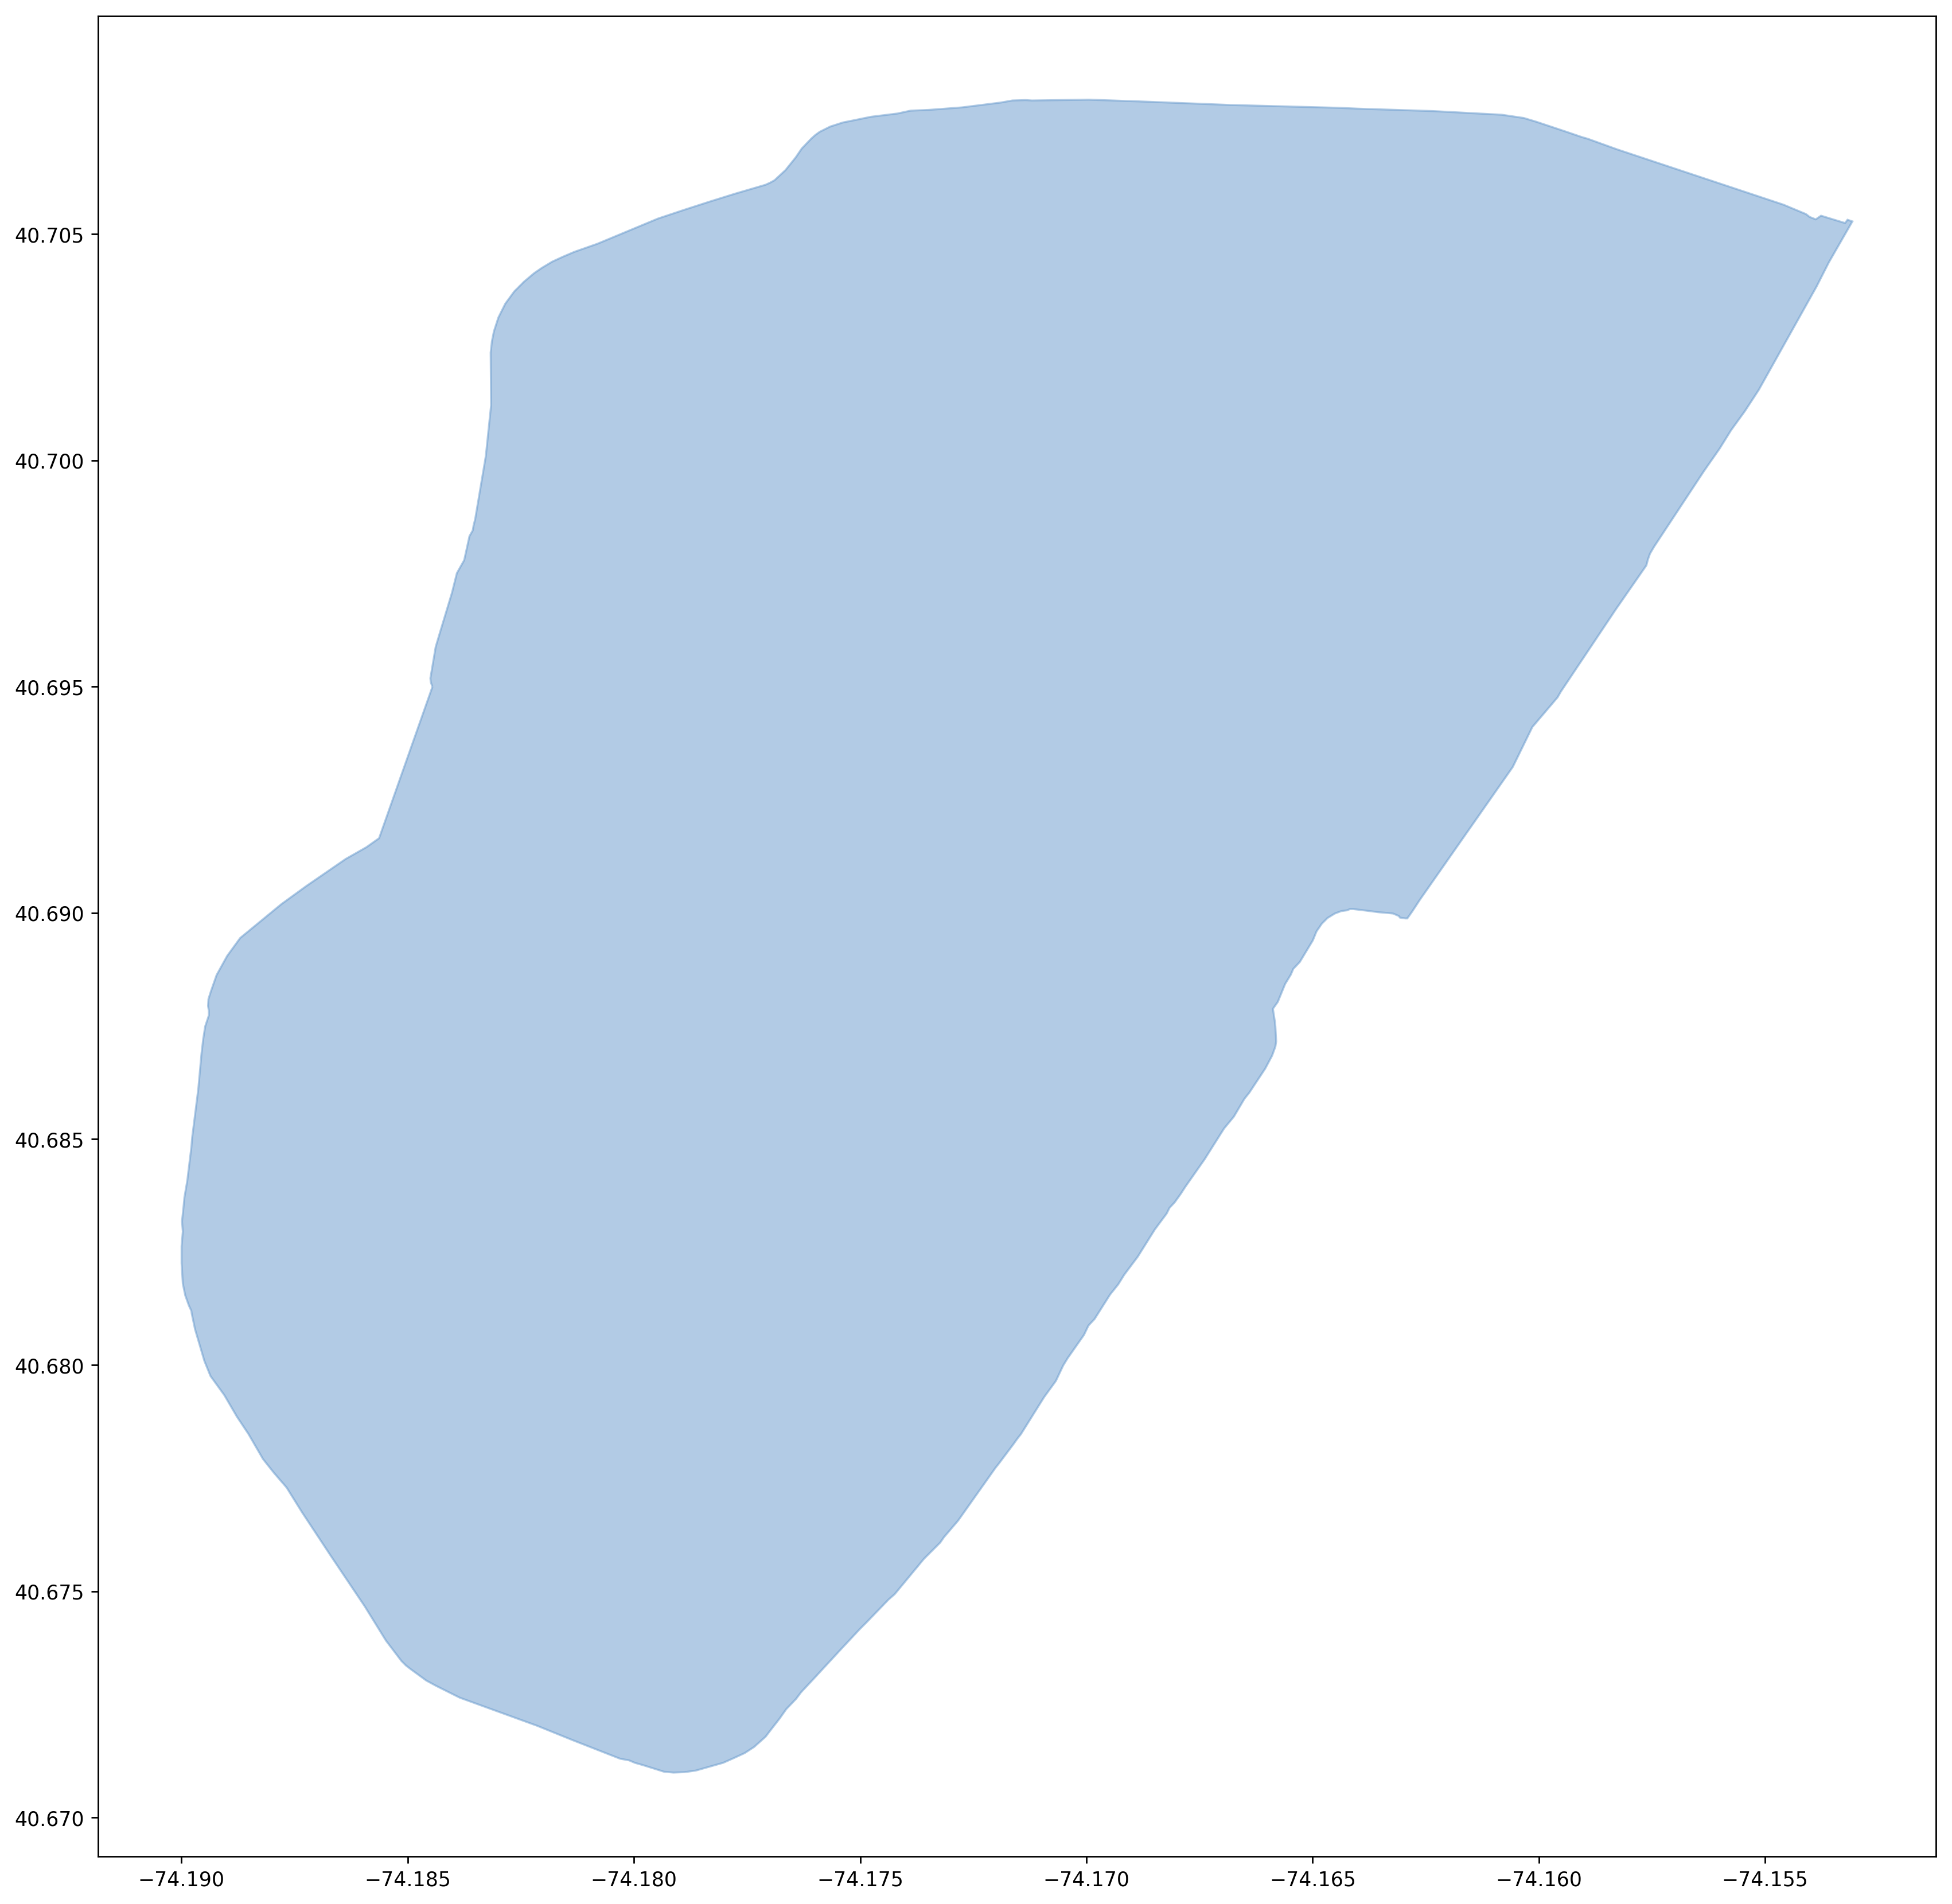

In [87]:
from descartes import PolygonPatch
BLUE = '#6699cc'
fig = plt.figure()
ax = fig.gca()
ax.add_patch(PolygonPatch(datos_map, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()